In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/diabetes.csv')

In [3]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Outcome,0


In [5]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [6]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

**KNN :**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, accuracy_score, precision_score, recall_score

print("KNN Performance")
print(classification_report(y_test, knn_predictions))
print("\n-------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("\n-------------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))

KNN Performance
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.63      0.53      0.57        74

    accuracy                           0.75       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231


-------------------------------------------------
Accuracy: 0.7489177489177489

-------------------------------------------------
Confusion Matrix:
 [[134  23]
 [ 35  39]]


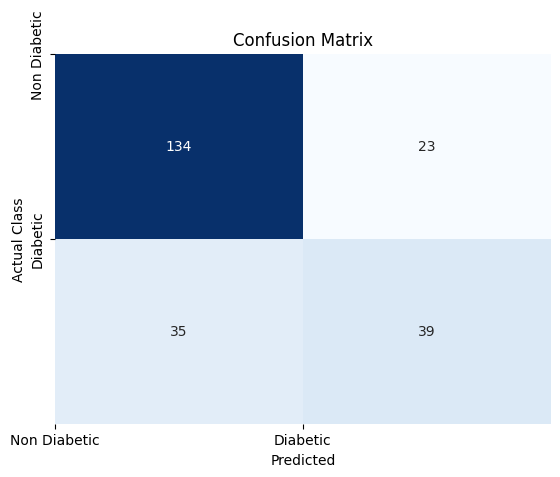

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,knn_predictions)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual Class')
plt.xticks([0, 1], ['Non Diabetic', 'Diabetic'])
plt.yticks([0, 1], ['Non Diabetic', 'Diabetic'])
plt.show()

**Evaluation Metrics :**

In [12]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, knn_predictions)
accuracy = accuracy_score(y_test, knn_predictions)
error_rate = 1 - accuracy
precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)

# Print the evaluation metrics

print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Error Rate: 0.2511
Precision: 0.6290
Recall: 0.5270
